In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

<h1> Read data <h1>

In [ ]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Column Children should be object column

df['children'] = df['children'].astype('object')

<h1> Data cleaning <h1>

Handling duplicated data

In [ ]:
#Finding duplicated data
duplicated_rows = df[df.duplicated(keep=False)]
print(duplicated_rows)
#Deleting duplicated data
df=df.drop_duplicates()
#Check the duplicated data again
duplicated_rows2 = df[df.duplicated()]
#Show result
print('Result after deleting duplicated data:', duplicated_rows2)

     age   sex    bmi children smoker     region    charges
195   19  male  30.59        0     no  northwest  1639.5631
581   19  male  30.59        0     no  northwest  1639.5631
Result after deleting duplicated data: Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


Handling missing value

In [ ]:
#Finding missing value
total_missing = df.isnull().sum()
print(total_missing)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Handling outlier

In [ ]:
num_cols = df.select_dtypes(exclude = 'object')
num_cols.columns

cat_cols = df.select_dtypes(include = 'object')
cat_cols.columns

Index(['sex', 'children', 'smoker', 'region'], dtype='object')

In [ ]:
from scipy import stats
import pandas as pd

print("Number of rows before filtering outliers:", len(df))

filtered_entries = np.array([True] * len(df))

for col in num_cols:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = filtered_entries & (zscore < 3)

outliers = df[~filtered_entries]  # Các dòng outlier đã bị loại bỏ
df = df[filtered_entries]

print("Number of rows after filtering outliers:", len(df))
print("Outliers removed:")
print(outliers)

Number of rows before filtering outliers: 1337
Number of rows after filtering outliers: 1326
Outliers removed:
      age     sex     bmi children smoker     region      charges
34     28    male  36.400        1    yes  southwest  51194.55914
116    58    male  49.060        0     no  southeast  11381.32540
543    54  female  47.410        0    yes  southeast  63770.42801
577    31  female  38.095        1    yes  northeast  58571.07448
819    33  female  35.530        0    yes  northwest  55135.40209
847    23    male  50.380        1     no  southeast   2438.05520
1047   22    male  52.580        1    yes  southeast  44501.39820
1146   60    male  32.800        0    yes  southwest  52590.82939
1230   52    male  34.485        3    yes  northwest  60021.39897
1300   45    male  30.360        0    yes  southeast  62592.87309
1317   18    male  53.130        0     no  southeast   1163.46270


<h1> Exploratory Analysis <h1>

Descriptive analysis

In [ ]:
df.describe()

,age,bmi,charges
count,1326.000000,1326.000000,1326.000000
mean,39.227753,30.570743,13039.837572
std,14.037019,5.992764,11677.031551
min,18.000000,15.960000,1121.873900
25%,27.000000,26.220000,4740.287150
50%,39.000000,30.300000,9303.297725
75%,51.000000,34.560000,16389.832412
max,64.000000,48.070000,49577.662400


Univirate analysis

In [ ]:
# Plotting numerical and categorical columns
num_cols = df.select_dtypes(exclude = 'object')
num_cols.columns
cat_cols = df.select_dtypes(include = 'object')
cat_cols.columns
f_cat = cat_cols.columns[:]

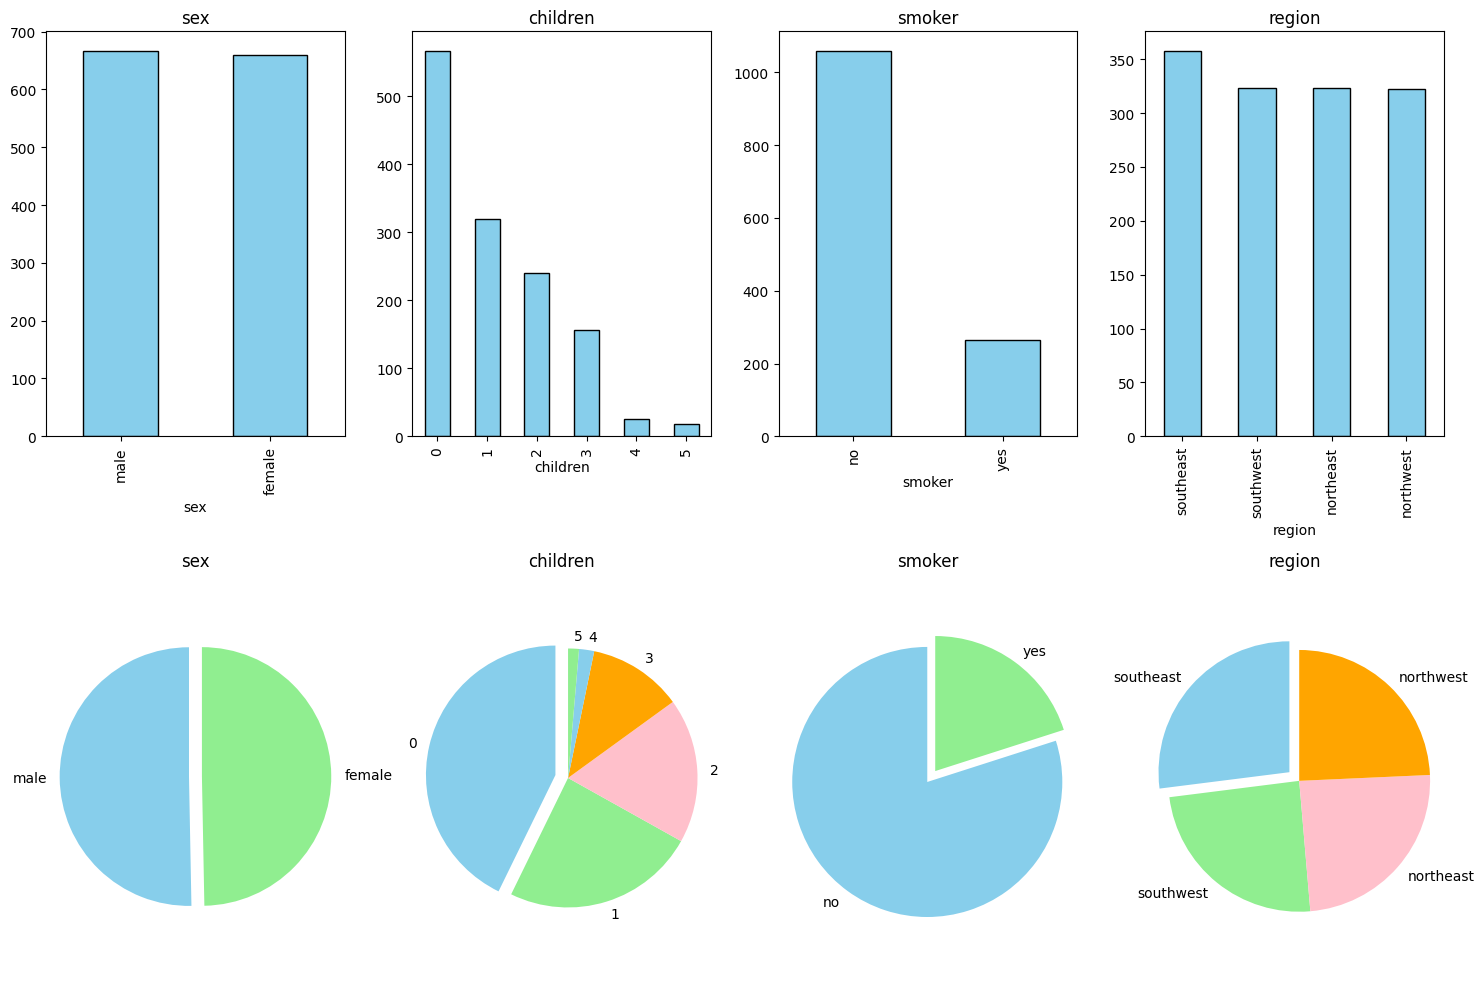

In [ ]:
# Tạo figure và axes
fig, axes = plt.subplots(nrows=2, ncols=len(f_cat), figsize=(15, 10))

# Vẽ biểu đồ cho từng biến
for i, ax in enumerate(axes[0]):
    data = cat_cols[f_cat[i]].value_counts()
    data.plot.bar(color='skyblue', edgecolor='black', ax=ax)
    ax.set_title(f_cat[i])

for i, ax in enumerate(axes[1]):
    data = cat_cols[f_cat[i]].value_counts()
    labels = data.index
    explode = [0.1] + [0] * (len(data) - 1)  # Đẩy ra phần rõ rệt cho phần tử đầu tiên
    colors = ['skyblue', 'lightgreen', 'pink', 'orange'][:len(data)]  # Sử dụng màu sắc tùy chỉnh

    ax.pie(data, labels=labels, explode=explode, colors=colors,
           autopct=None, startangle=90)
    ax.set_title(f_cat[i])

    ax.axis('equal')  # Tạo hình tròn

# Tự động điều chỉnh khoảng cách giữa các đồ thị
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24908\1031791659.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[col], rug=True, color='lightgreen', ax=ax1)


<Figure size 1500x600 with 0 Axes>

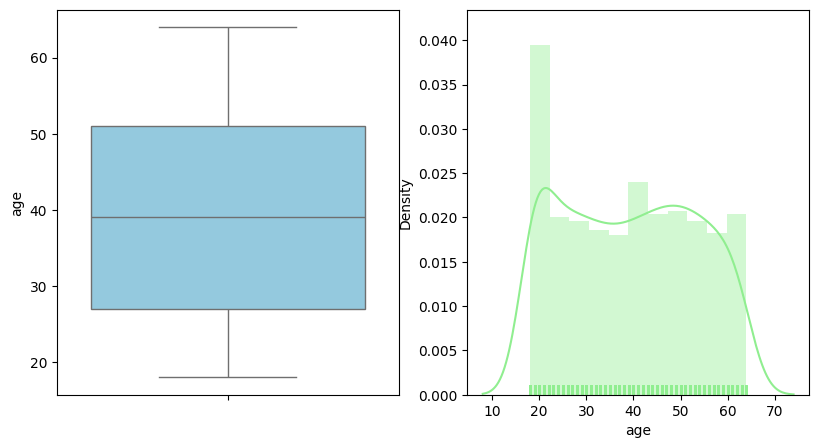

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24908\1031791659.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[col], rug=True, color='lightgreen', ax=ax1)


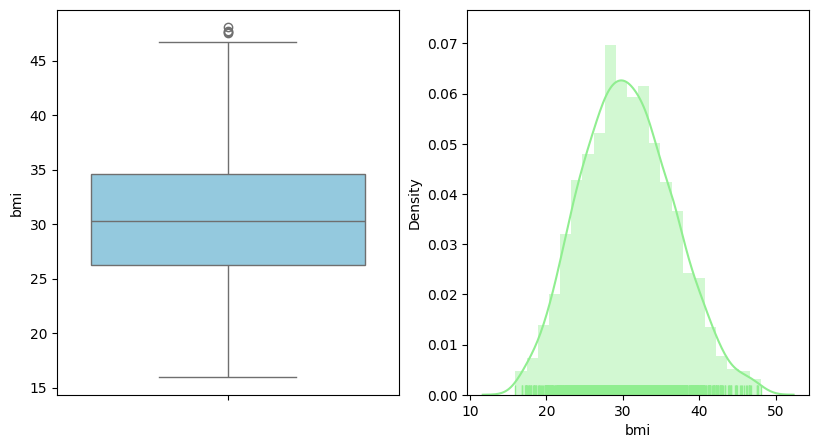

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24908\1031791659.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[col], rug=True, color='lightgreen', ax=ax1)


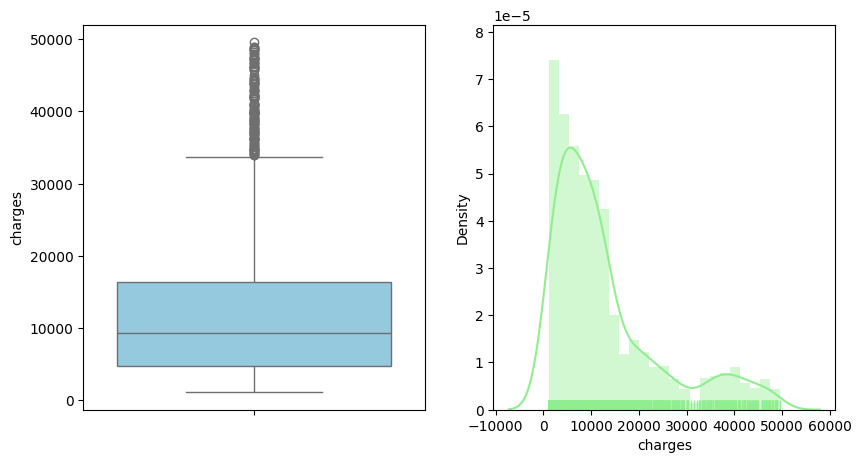

In [ ]:
plt.figure(figsize=(15, 6))
f_num = num_cols.columns[:]

colors = ['skyblue', 'lightgreen', 'pink', 'orange']  # Màu sắc tùy chỉnh

for i, col in enumerate(f_num):
    f = plt.figure(figsize=(15, 5))
    ax = f.add_subplot(131)
    sns.boxplot(num_cols[col], color='skyblue', ax=ax)

    ax1 = f.add_subplot(132)
    sns.distplot(num_cols[col], rug=True, color='lightgreen', ax=ax1)

    plt.show()

Bivariate analysis

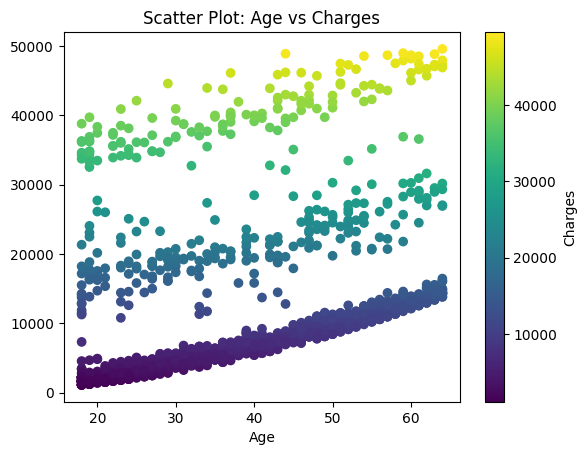

In [ ]:
# Generate a colormap
cmap = plt.get_cmap('viridis')

# Scatter plot: age vs charges with colormap
plt.scatter(df['age'], df['charges'], c=df['charges'], cmap=cmap)
plt.xlabel('Age')
plt.title('Scatter Plot: Age vs Charges')

# Add a colorbar
cbar = plt.colorbar()
cbar.set_label('Charges')

plt.show()

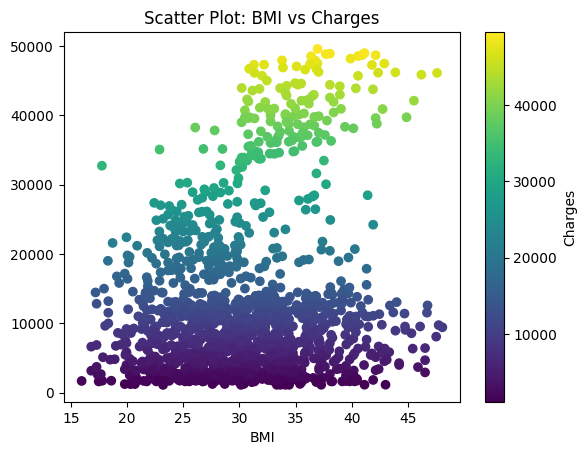

In [ ]:
# Generate a colormap
cmap = plt.get_cmap('viridis')

# Scatter plot: age vs charges with colormap
plt.scatter(df['bmi'], df['charges'], c=df['charges'], cmap=cmap)
plt.xlabel('BMI')
plt.title('Scatter Plot: BMI vs Charges')

# Add a colorbar
cbar = plt.colorbar()
cbar.set_label('Charges')

plt.show()

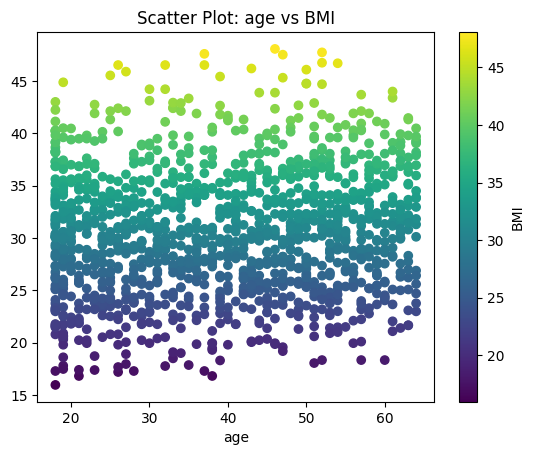

In [ ]:
# Generate a colormap
cmap = plt.get_cmap('viridis')

# Scatter plot: age vs charges with colormap
plt.scatter(df['age'], df['bmi'], c=df['bmi'], cmap=cmap)
plt.xlabel('age')
plt.title('Scatter Plot: age vs BMI')

# Add a colorbar
cbar = plt.colorbar()
cbar.set_label('BMI')

plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24908\3768309904.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_cols[i[1]], y=df.charges, palette=custom_palette)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24908\3768309904.py:7: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x=cat_cols[i[1]], y=df.charges, palette=custom_palette)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24908\3768309904.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_cols[i[1]], y=df.charges, palette=custom_palette)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24908\3768309904.py:10: UserWarning: The palette list has more values (6) than n

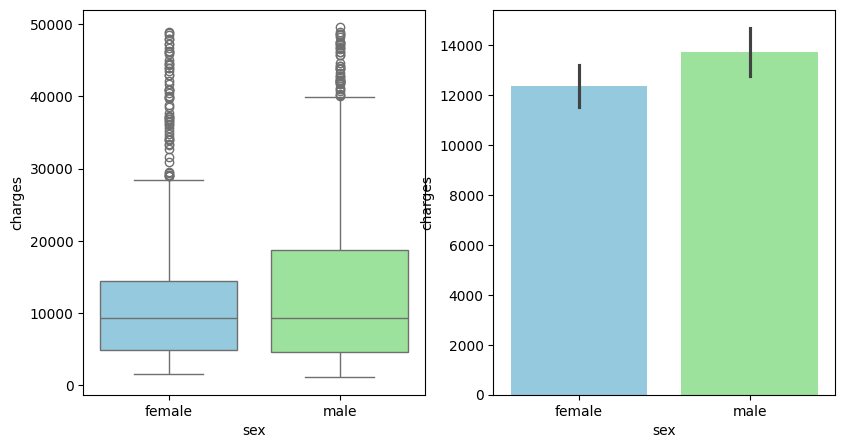

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24908\3768309904.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_cols[i[1]], y=df.charges, palette=custom_palette)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24908\3768309904.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_cols[i[1]], y=df.charges, palette=custom_palette)


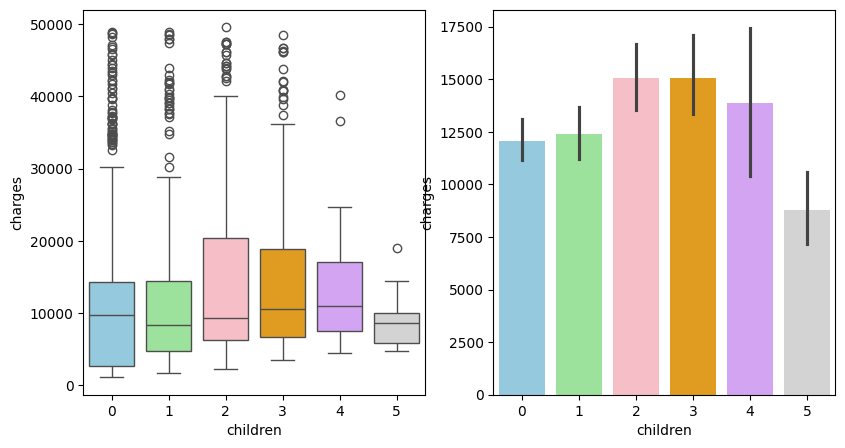

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24908\3768309904.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_cols[i[1]], y=df.charges, palette=custom_palette)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24908\3768309904.py:7: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x=cat_cols[i[1]], y=df.charges, palette=custom_palette)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24908\3768309904.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_cols[i[1]], y=df.charges, palette=custom_palette)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24908\3768309904.py:10: UserWarning: The palette list has more values (6) than n

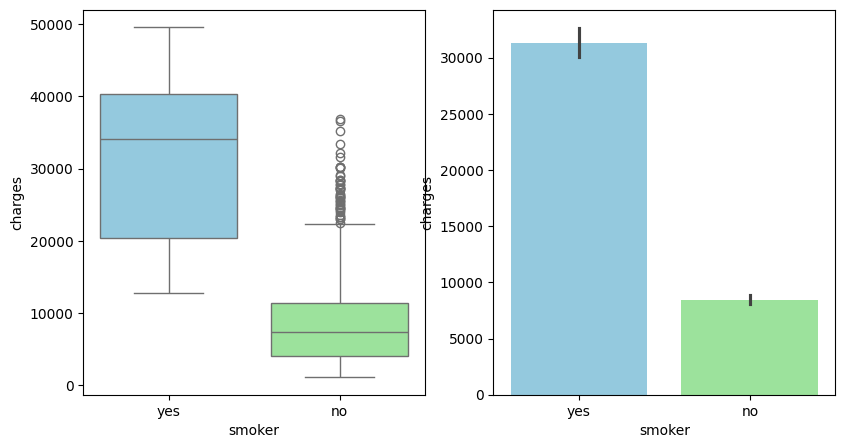

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24908\3768309904.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_cols[i[1]], y=df.charges, palette=custom_palette)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24908\3768309904.py:7: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.boxplot(x=cat_cols[i[1]], y=df.charges, palette=custom_palette)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24908\3768309904.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_cols[i[1]], y=df.charges, palette=custom_palette)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24908\3768309904.py:10: UserWarning: The palette list has more values (6) than n

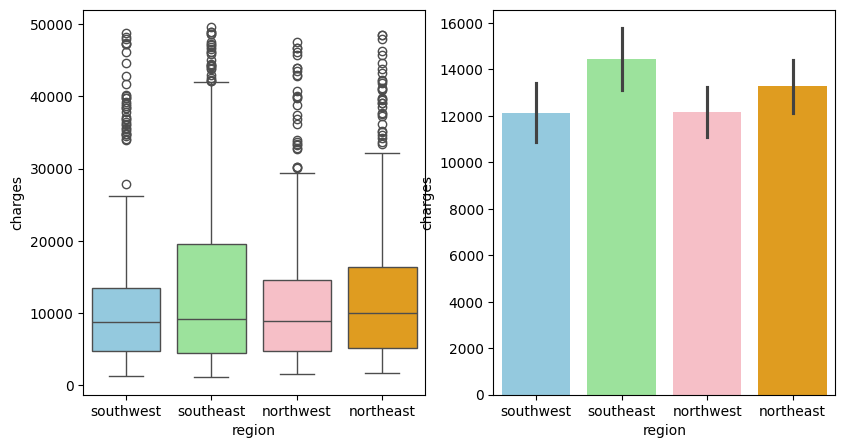

In [ ]:
# Tạo một bảng màu tùy chỉnh
custom_palette = ["skyblue", "lightgreen", "#FFB6C1", "orange", "#D697FF", "#D3D3D3"]

for i in enumerate(f_cat):
    f = plt.figure(figsize=(15,5))
    ax = f.add_subplot(131)
    sns.boxplot(x=cat_cols[i[1]], y=df.charges, palette=custom_palette)

    ax1 = f.add_subplot(132)
    sns.barplot(x=cat_cols[i[1]], y=df.charges, palette=custom_palette)

    plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24908\3528629932.py:3: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x='region', y='charges', hue='sex', data=df, palette=custom_palette)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24908\3528629932.py:6: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x='region', y='charges', hue='smoker', data=df, palette=custom_palette)


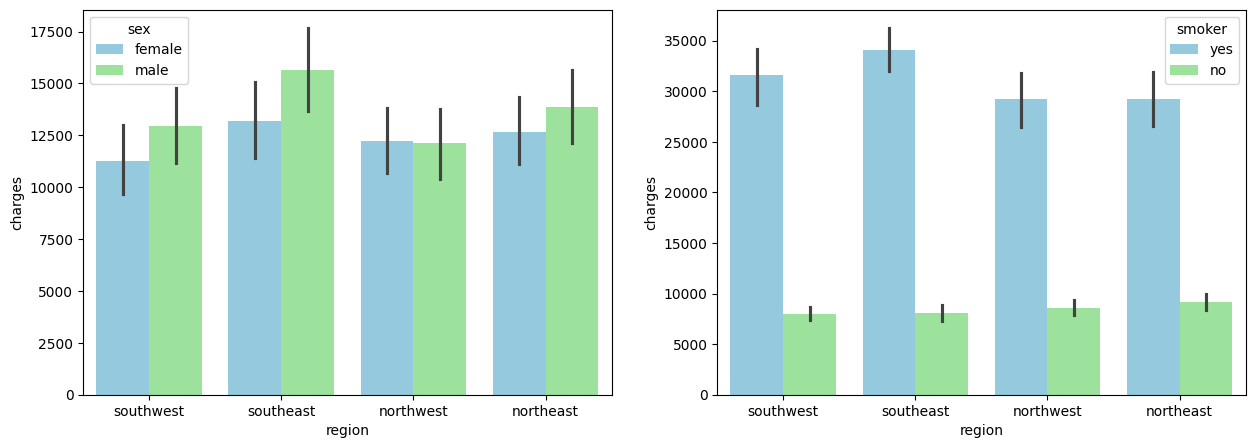

In [ ]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
sns.barplot(x='region', y='charges', hue='sex', data=df, palette=custom_palette)

ax1 = f.add_subplot(122)
sns.barplot(x='region', y='charges', hue='smoker', data=df, palette=custom_palette)

plt.show()

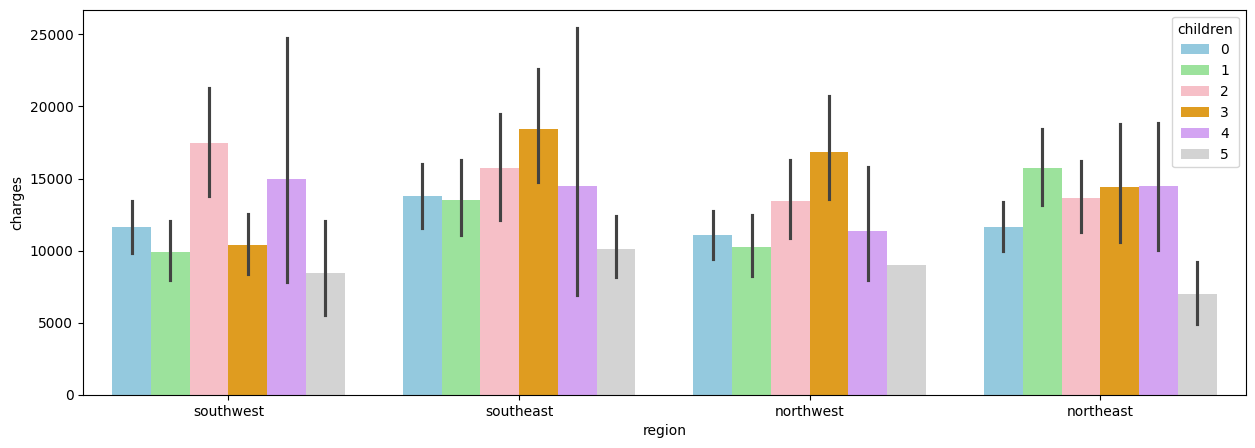

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='region', y='charges', hue='children', data=df, palette=custom_palette)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24908\758075584.py:3: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.scatterplot(data=df, x='age', y='charges', hue='region', palette=custom_palette, ax=ax)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24908\758075584.py:6: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.scatterplot(data=df, x='bmi', y='charges', hue='region', palette=custom_palette, ax=ax1)


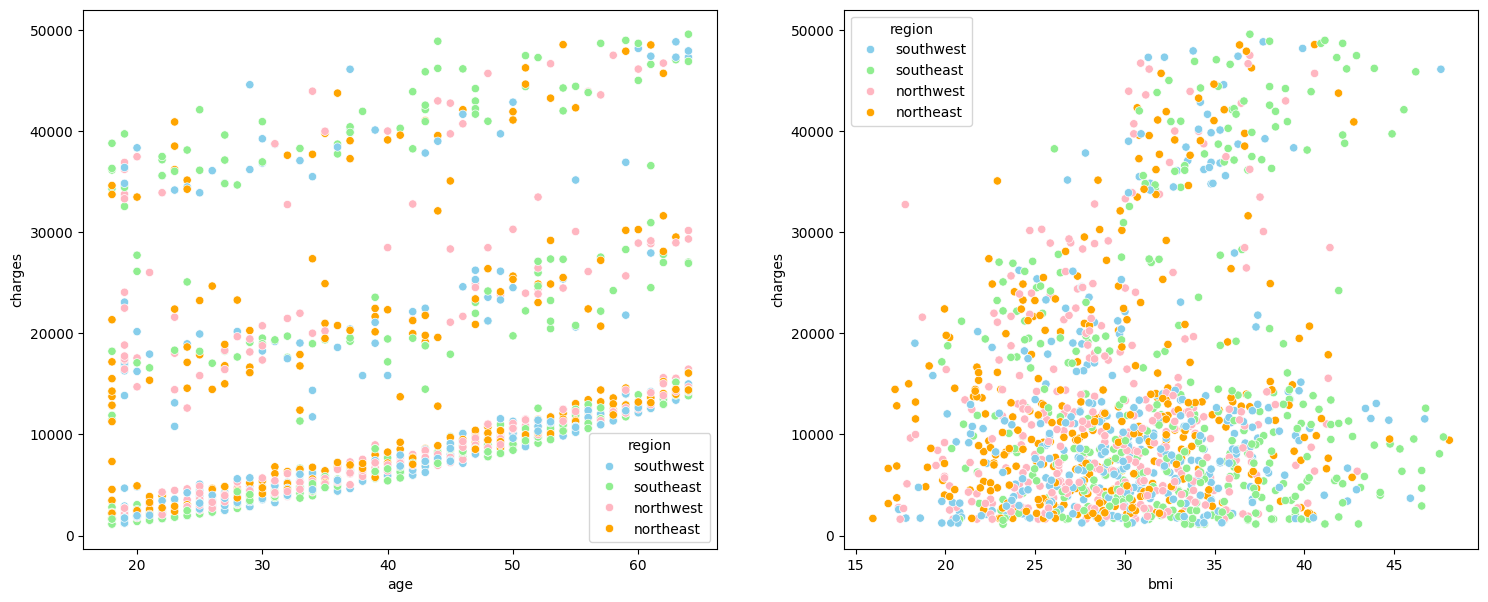

In [ ]:


f = plt.figure(figsize=(18, 7))
ax = f.add_subplot(121)
sns.scatterplot(data=df, x='age', y='charges', hue='region', palette=custom_palette, ax=ax)

ax1 = f.add_subplot(122)
sns.scatterplot(data=df, x='bmi', y='charges', hue='region', palette=custom_palette, ax=ax1)

plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24908\3563543149.py:3: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(data=df, x='sex', y='charges', hue='smoker', palette=custom_palette, ax=ax)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24908\3563543149.py:6: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(data=df, x='children', y='charges', hue='smoker', palette=custom_palette, ax=ax1)


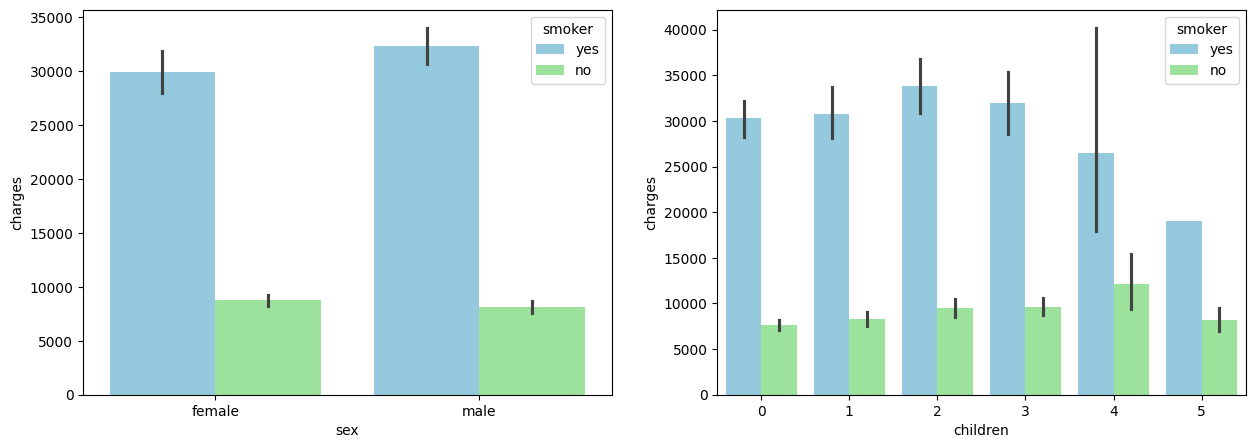

In [ ]:

f = plt.figure(figsize=(15, 5))
ax = f.add_subplot(121)
sns.barplot(data=df, x='sex', y='charges', hue='smoker', palette=custom_palette, ax=ax)

ax1 = f.add_subplot(122)
sns.barplot(data=df, x='children', y='charges', hue='smoker', palette=custom_palette, ax=ax1)

plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24908\3185860980.py:4: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(data=df, x='age', y='charges', hue='smoker', palette=custom_palette2, ax=ax)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24908\3185860980.py:7: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker',palette=custom_palette2, ax=ax1)


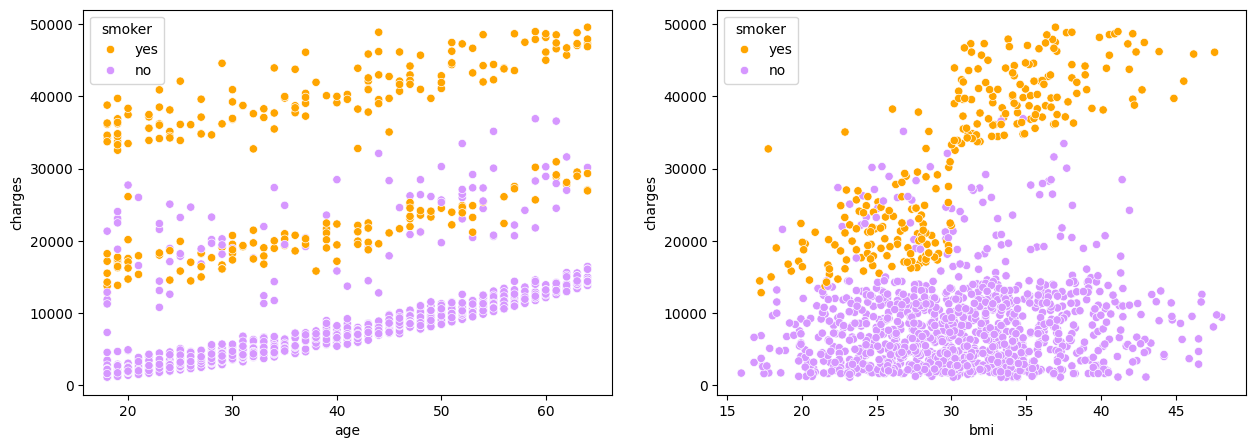

In [ ]:
custom_palette2 = ["orange", "#D697FF", "#D3D3D3"]
f = plt.figure(figsize=(15, 5))
ax = f.add_subplot(121)
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', palette=custom_palette2, ax=ax)

ax1 = f.add_subplot(122)
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker',palette=custom_palette2, ax=ax1)

plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24908\2045607077.py:10: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(data=df, x='children', y='charges', hue='sex', palette=custom_palette, ax=ax)


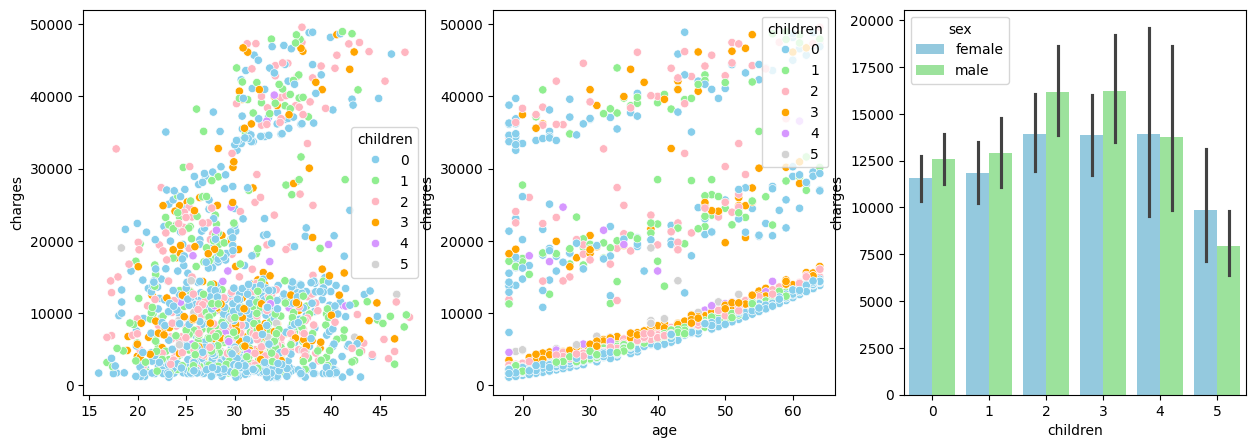

In [ ]:
f = plt.figure(figsize=(15, 5))

ax1 = f.add_subplot(131)
sns.scatterplot(data=df, x='bmi', y='charges', hue='children', palette=custom_palette, ax=ax1)

ax2 = f.add_subplot(132)
sns.scatterplot(data=df, x='age', y='charges', hue='children',palette=custom_palette, ax=ax2)

ax = f.add_subplot(133)
sns.barplot(data=df, x='children', y='charges', hue='sex', palette=custom_palette, ax=ax)

plt.show()

<h1> Machine learning application <h1>

Processing

In [ ]:
# Column sex
sex_dummies = pd.get_dummies(df.sex, drop_first= True)

df= pd.concat([df, sex_dummies], axis = 1)

# Column smoker
smoker_dummies = pd.get_dummies(df.smoker, drop_first= True)

df = pd.concat([df, smoker_dummies], axis = 1)

# Column region
region_dummies = pd.get_dummies(df.region,prefix = 'region_', drop_first= True)

df = pd.concat([df, region_dummies], axis = 1)

df

,age,sex,bmi,children,smoker,region,charges,male,yes,region__northwest,region__southeast,region__southwest
0,19,female,27.900,0,yes,southwest,16884.92400,False,True,False,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False,False,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False,False,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False,True,False,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,True,False,True,False,False
1334,18,female,31.920,0,no,northeast,2205.98080,False,False,False,False,False
1335,18,female,36.850,0,no,southeast,1629.83350,False,False,False,True,False
1336,21,female,25.800,0,no,southwest,2007.94500,False,False,False,False,True


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes,region__northwest,region__southeast,region__southwest
0,19,female,27.900,0,yes,southwest,16884.92400,False,True,False,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False,False,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False,False,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False,True,False,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False,True,False,False


In [ ]:
df=df.drop('sex', axis=1)
df=df.drop('smoker', axis=1)
df=df.drop('region', axis=1)
df.head()

,age,bmi,children,charges,male,yes,region__northwest,region__southeast,region__southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [ ]:
df['charges'] = round(df['charges'],2)

In [ ]:
X = df.drop(['charges'], axis=1)
y = df['charges']

In [ ]:
# Train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state= 42)

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

linear_reg = lr.fit(X_train, y_train)
y_pred_lin = linear_reg.predict(X_train)
y_test_pred_lin = linear_reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

# Tính MSE, MAE, và EVS cho tập huấn luyện
mse_train = mean_squared_error(y_train, y_pred_lin)
mae_train = mean_absolute_error(y_train, y_pred_lin)
evs_train = explained_variance_score(y_train, y_pred_lin)
r2_train = r2_score(y_train, y_pred_lin)

# Tính MSE, MAE, và EVS cho tập kiểm tra
mse_test = mean_squared_error(y_test, y_test_pred_lin)
mae_test = mean_absolute_error(y_test, y_test_pred_lin)
evs_test = explained_variance_score(y_test, y_test_pred_lin)
r2_test = r2_score(y_test, y_test_pred_lin)

# In kết quả
print("Train Metrics:")
print(f'MSE: {mse_train}')
print(f'MAE: {mae_train}')
print(f'EVS: {evs_train}')
print(f'R2 score: {r2_train}')

print("\nTest Metrics:")
print(f'MSE: {mse_test}')
print(f'MAE: {mae_test}')
print(f'EVS: {evs_test}')
print(f'R2 score: {r2_test}')

Train Metrics:
MSE: 33665880.38401735
MAE: 4026.880703453504
EVS: 0.7535653882262375
R2 score: 0.7535653882262375

Test Metrics:
MSE: 34214506.06871899
MAE: 4023.9335455060796
EVS: 0.7494814875484863
R2 score: 0.7468367936503437
